In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('KaggleV2_May_2016.csv')
df.shape

(110527, 14)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [75]:
obj = df.select_dtypes(include = 'object').columns
obj = pd.DataFrame({'object':obj})
obj

,object
0,Gender
1,ScheduledDay
2,AppointmentDay
3,Neighbourhood
4,No-show


In [76]:
non_obj = df.select_dtypes(exclude = 'object').columns
non_obj = pd.DataFrame({'non-object':non_obj})
non_obj

,non-object
0,PatientId
1,AppointmentID
2,Age
3,Scholarship
4,Hipertension
5,Diabetes
6,Alcoholism
7,Handcap
8,SMS_received


In [77]:
df.duplicated().sum() # 중복 행 파악

0

In [78]:
df.isna().sum() # 결측치 파악

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [79]:
df.nunique() 

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [80]:
# object type 

cols = df.select_dtypes(include = 'object').columns

for col in cols:
    print(df[col].value_counts())
    print('-'*30)

Gender
F    71840
M    38687
Name: count, dtype: int64
------------------------------
ScheduledDay
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: count, Length: 103549, dtype: int64
------------------------------
AppointmentDay
2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z   

In [81]:
#float & int type

cols = df.select_dtypes(exclude = 'object').columns

for col in cols:
    print(df[col].describe())
    print('-'*30)

count    1.105270e+05
mean     1.474963e+14
std      2.560949e+14
min      3.921784e+04
25%      4.172614e+12
50%      3.173184e+13
75%      9.439172e+13
max      9.999816e+14
Name: PatientId, dtype: float64
------------------------------
count    1.105270e+05
mean     5.675305e+06
std      7.129575e+04
min      5.030230e+06
25%      5.640286e+06
50%      5.680573e+06
75%      5.725524e+06
max      5.790484e+06
Name: AppointmentID, dtype: float64
------------------------------
count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64
------------------------------
count    110527.000000
mean          0.098266
std           0.297675
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Scholarship, dtype: float64
------------------------------
count    110527.000000
mean 

In [3]:
# age가 음수가 있으므로 음수 제거
cond1 = df['Age']>=0
df = df[cond1]

In [2]:
df.drop(columns = ['AppointmentID'], inplace = True)

In [100]:
#ScheduledDay 예약 생성 날짜 / AppointmentDay 실제 병원 방문 날짜
#AppointmentDay - ScheduledDay
# 날짜 형식 변환
# 올바른 방법: timedelta 값을 일 단위로 변환
df['ScheduledDay_date'] = df['ScheduledDay'].str[:10]
df['AppointmentDay_date'] = df['AppointmentDay'].str[:10]

df['ScheduledDay_date'] = pd.to_datetime(df['ScheduledDay_date'])
df['AppointmentDay_date'] = pd.to_datetime(df['AppointmentDay_date'])

df['day_diff'] = df['AppointmentDay_date'] - df['ScheduledDay_date']

df['day_diff'] = df['day_diff'].dt.days

In [ ]:
df['day_diff'].describe() 

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: day_diff, dtype: float64

In [101]:
#음수 - > 방문날짜가 예약날짜보다 먼저라는건데 말이 안됨 -> 음수 삭제

cond1 = df['day_diff'] >= 0
df = df[cond1]

In [102]:
df['day_diff'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: day_diff, dtype: float64

In [103]:
# 당일 예약(방문 접수) (AppointmentDay-ScheduledDay) < 0 -> 0 으로 / 나머지 예약 시간 차이 파악
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']) #예약이 먼저면 이 값이 더 낮음

df['time_diff'] = df['AppointmentDay']-df['ScheduledDay'] # 결과가 양수로 나오겠지?
df['time_diff'] = df['time_diff'].dt.total_seconds()/60/60 # 시간으로 반환

import numpy as np
df['time_diff'] = np.where(df['time_diff']<0, 0, df['time_diff'])
df['time_diff'] = round(df['time_diff'],0).astype(int)
df.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_date,AppointmentDay_date,day_diff,time_diff
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0,0
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0,0


In [104]:
# 당일 예약 인 경우와 선예약 컬럼 추가
df['ReservationType'] = np.where(df['day_diff'] == 0 , 'SameDay','PreScheduled')
df.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_date,AppointmentDay_date,day_diff,time_diff,ReservationType
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0,0,SameDay
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0,0,SameDay


In [105]:
# Appointment_weekday	방문일의 요일
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['Appointment_weekday'] = df['AppointmentDay'].dt.day_of_week # 0 월요일 ~ 6 일요일

df.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_date,AppointmentDay_date,day_diff,time_diff,ReservationType,Appointment_weekday
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0,0,SameDay,4
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0,0,SameDay,4


In [106]:
# is_weekend	예약일 또는 방문일이 주말인지 여부 
print(df['Appointment_weekday'].value_counts()) #6(일요일) 존재 X
df['is_weekend'] = np.where(df['Appointment_weekday'] == 5, 1, 0)

Appointment_weekday
2    25866
1    25638
0    22713
4    19019
3    17246
5       39
Name: count, dtype: int64


In [107]:
print(df['is_weekend'].value_counts())

is_weekend
0    110482
1        39
Name: count, dtype: int64


In [108]:
cols = ['ScheduledDay','AppointmentDay']
df.drop(columns = cols, inplace = True)

In [109]:
df.head(2)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_date,AppointmentDay_date,day_diff,time_diff,ReservationType,Appointment_weekday,is_weekend
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0,0,SameDay,4,0
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0,0,SameDay,4,0


In [110]:
len(df)

110521

In [112]:
#과거-현재까지 no-show 횟수 합 <- no-show 횟수 많이 한 사람 또 no-show 가능성 높다고 추정
df['No-show'] = np.where(df['No-show']=='No',0,1)
df['Num_App_Missed'] = df.groupby('PatientId')['No-show'].transform('cumsum') #과거에 no-show한 전적 수

In [113]:
df.head(2)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_date,AppointmentDay_date,day_diff,time_diff,ReservationType,Appointment_weekday,is_weekend,Num_App_Missed
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29,0,0,SameDay,4,0,0
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0,SameDay,4,0,0


In [5]:
df.drop(columns = ['PatientId','ScheduledDay','AppointmentDay'], inplace = True)

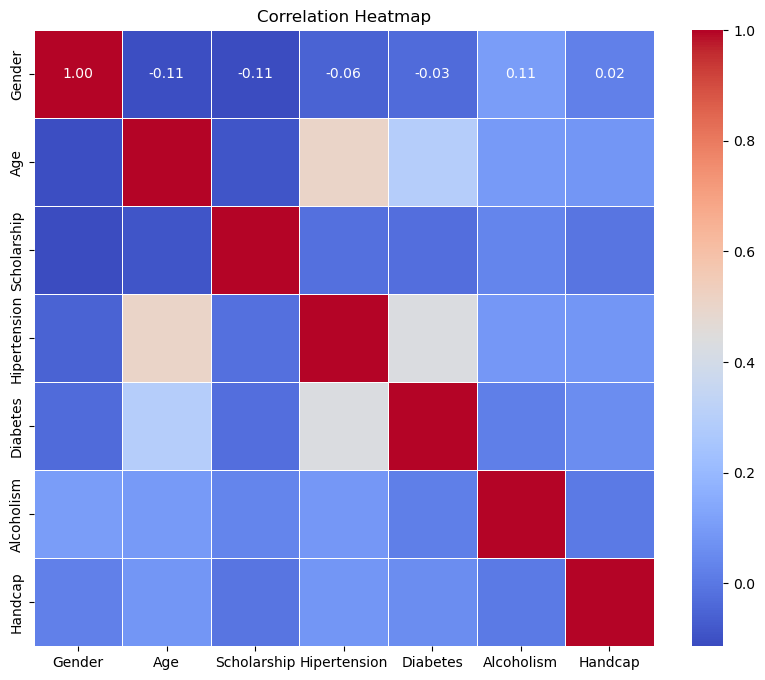

In [127]:
#당뇨 & 고혈압
df_copy = df.copy()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cols = df_copy.select_dtypes(include = 'object').columns
for col in cols:
    df_copy[col] = encoder.fit_transform(df_copy[col])

# 변수 간 상관관계 계산
corr_matrix = df_copy[['Gender','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap']].corr()

import seaborn as sns

# Heatmap 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# 제목 추가
plt.title('Correlation Heatmap')

# 그래프 표시
plt.show()


In [6]:
df["diabetes&Hipertension"] = df["Diabetes"]*df["Hipertension"]


In [9]:
# Handcap 0->0 / 나머지 1,2,3,4 - > 1로
df['Handcap'] = np.where(df['Handcap'] == 0 , 0,1)
df['Handcap'].value_counts()

Handcap
0    108285
1      2241
Name: count, dtype: int64

#Modeling

#Optuna 활용 -> 최적 파라미터 찾기

In [10]:
# 최종 모델
import pandas as pd

x = df.drop(columns = ['No-show'])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cols = x.select_dtypes(include = 'object').columns

for col in cols:
    x[col] = encoder.fit_transform(x[col])

df['No-show'] = encoder.fit_transform(df['No-show'])
y = df['No-show']

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, random_state = 42, test_size = 0.3, stratify=y)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42, n_estimators=150, max_depth=15, min_samples_split=5)
rf.fit(x_train, y_train)

rf_pred_train = rf.predict(x_train)
rf_pred = rf.predict(x_val)

rf_pred_proba_train = rf.predict_proba(x_train)
rf_pred_proba = rf.predict_proba(x_val)


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

rf_accuracy = accuracy_score(y_val,rf_pred)
rf_recall = recall_score(y_val, rf_pred)
rf_precision = precision_score(y_val, rf_pred)
rf_score = f1_score(y_val, rf_pred)

print('RandomForest')
print('accuracy_score : {:.4f}'.format(rf_accuracy))
print('recall_score : {:.4f}'.format(rf_recall))
print('precision_score : {:.4f}'.format(rf_precision))
print('f1-score : {:.4f}'.format(rf_score))

RandomForest
accuracy_score : 0.7964
recall_score : 0.0172
precision_score : 0.4035
f1-score : 0.0329


: 

In [ ]:
#df.to_csv('df_final.csv',index = False)

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay

# Confusion Matrix 계산 및 시각화
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[ "Show","No-show"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# ROC-AUC Curve 계산 및 시각화
def plot_roc_auc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (Val)")
    plt.legend(loc="lower right")
    plt.show()


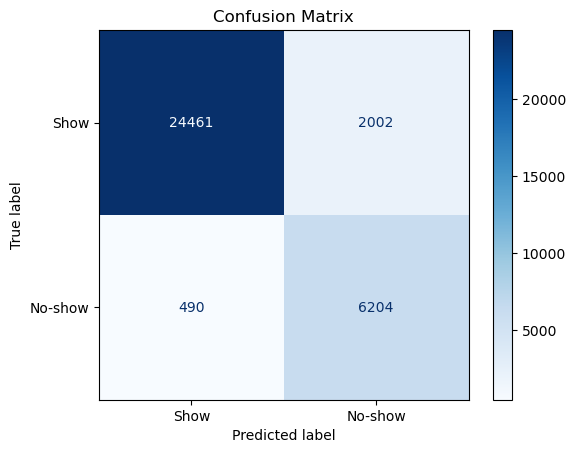

In [14]:
plot_confusion_matrix(y_val, rf_pred)

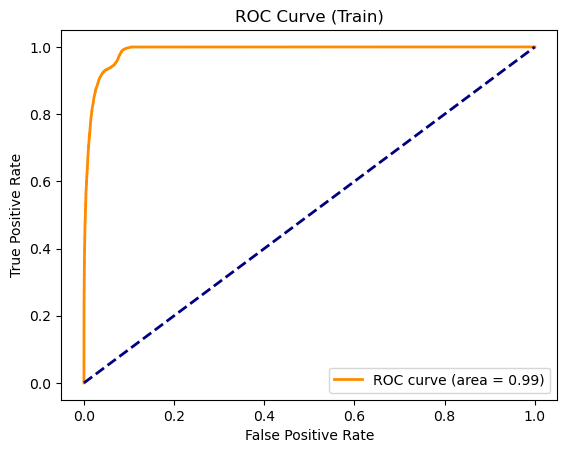

In [29]:
plot_roc_auc_curve(y_train, rf_pred_proba_train[:,1])

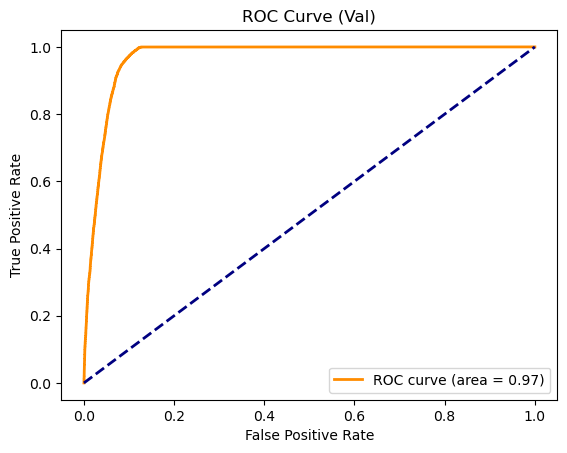

In [31]:
plot_roc_auc_curve(y_val, rf_pred_proba[:,1])